In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import plotting
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv('./data/HASC-BasicActivity/Person1201-acc.csv')
df.head()


,time,x,y,z,label
0,1.360803e+09,-0.921875,-0.610352,0.386719,stay
1,1.360803e+09,0.121094,-0.968750,0.127930,stay
2,1.360803e+09,0.120117,-0.967773,0.131836,stay
3,1.360803e+09,0.119141,-0.964844,0.133789,stay
4,1.360803e+09,0.125000,-0.968750,0.137695,stay


In [3]:
# stay, walk, jog, skip, stUp, stDown
df['label'] = df['label'].map({'stay': 0, 'walk': 1, 'jog': 2, 'skip': 3, 'stUp': 4, 'stDown': 5})


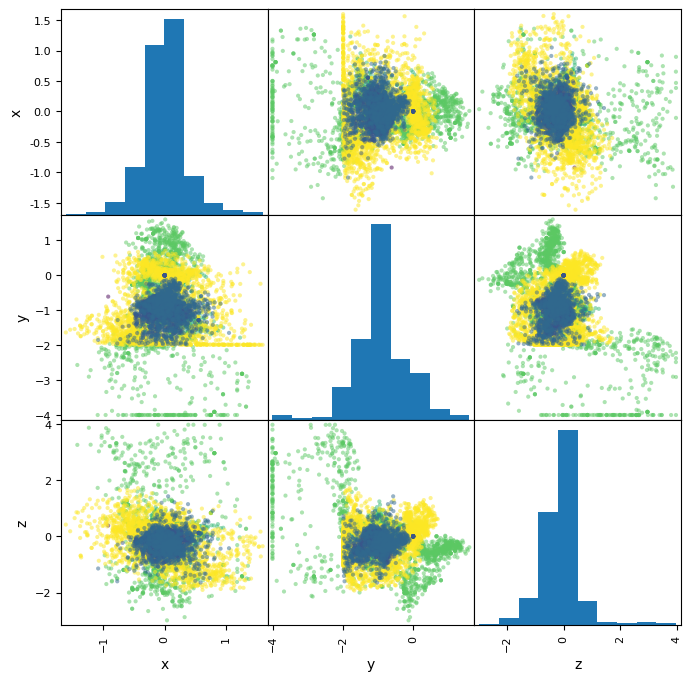

In [4]:
plotting.scatter_matrix(df.iloc[:, 1:-1], figsize=(8, 8), c=list(df.iloc[:, 0]), alpha=0.5)
plt.show()


In [5]:
# 行列の標準化
dfs = df.iloc[:, 1:-1].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs.head()


,x,y,z
0,-2.714313,0.374544,0.746502
1,0.358756,-0.098847,0.370224
2,0.355877,-0.097556,0.375903
3,0.353001,-0.093688,0.378743
4,0.370265,-0.098847,0.384422


In [6]:
# 主成分分析の実行
pca = PCA()
pca.fit(dfs)
# データを主成分空間に写像
feature = pca.transform(dfs)

# 主成分得点
pd.DataFrame(
    feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]
).head()


,PC1,PC2,PC3
0,1.687059,-2.200109,0.615137
1,0.131523,0.325571,-0.390189
2,0.136293,0.322615,-0.393463
3,0.137756,0.317855,-0.396012
4,0.135763,0.333797,-0.405950


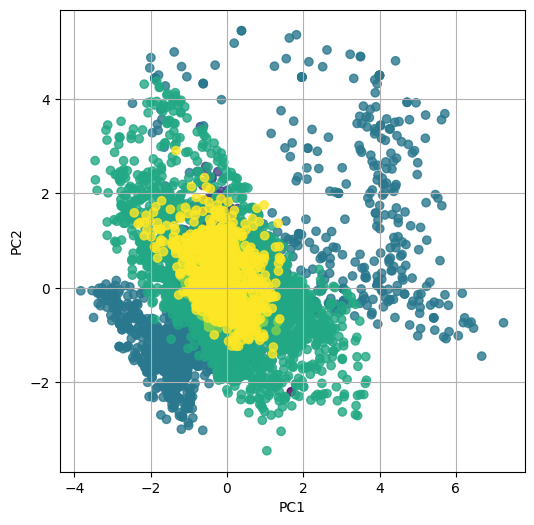

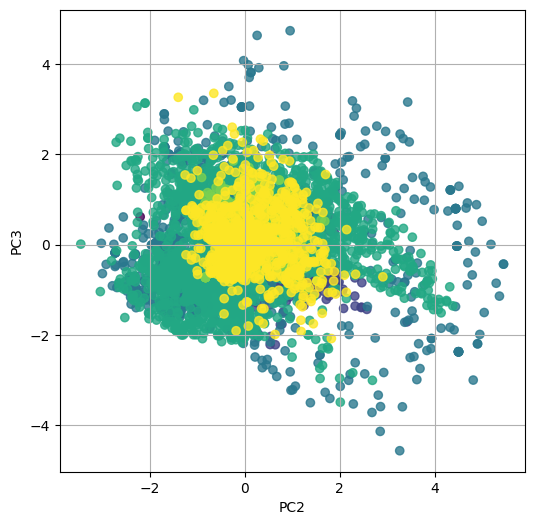

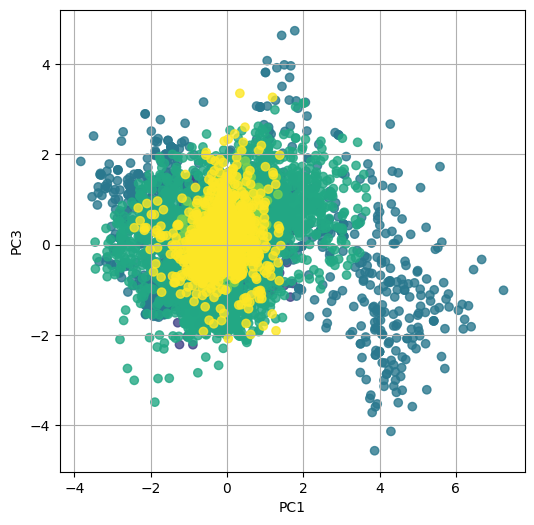

In [7]:
# 

# 第一主成分と第二主成分でプロットする
def plot(pc_a, pc_b):
    plt.figure(figsize=(6, 6))
    plt.scatter(feature[:, pc_a - 1], feature[:, pc_b - 1], alpha=0.8, c=list(df.iloc[:, -1]))
    plt.grid()
    plt.xlabel(f"PC{pc_a}")
    plt.ylabel(f"PC{pc_b}")
    plt.show()

plot(1, 2)
plot(2, 3)
plot(1, 3)


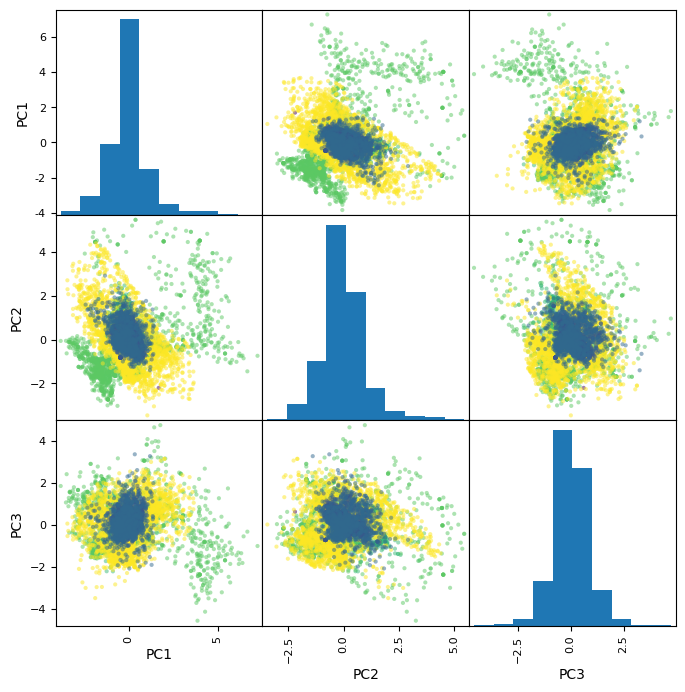

In [8]:
plotting.scatter_matrix(
    pd.DataFrame(
        feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]
    ),
    figsize=(8, 8),
    c=list(df.iloc[:, 0]),
    alpha=0.5,
)
plt.show()
